In [1]:
import pandas as pd
import numpy as np
import plotly.graph_objs as go
import plotly.plotly as py
import plotly
import os
import glob
import math
import statistics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import copy
from random import randrange
from sklearn.metrics import jaccard_score
import random

from sklearn.decomposition import PCA #for cluster analysis
from gensim.models import KeyedVectors #for word embeddings
import matplotlib.pyplot as plt #for plotting
import os #for importing
import pickle #for loading transcripts
from scipy.stats import pearsonr 

# from _DRAFT_20200604_functions import * #includes constants and score function
from tqdm import tqdm_notebook #for progress bar

%autosave 5

Autosaving every 5 seconds


# 0. Importing story and template vectors and sums 

In [2]:
templates = pickle.load( open( 'template_vc', "rb" ) )
stories = pickle.load( open( 'story_vc', "rb" ) )
# sums
sums = pickle.load( open( "new_sums", "rb" ) )

# I. Correlation between word vectors of recall and template word vectors
## A. Get a 2 X 3 matrix for each story

In [8]:
sums[key]

NameError: name 'key' is not defined

In [3]:
keypress_array = {}
summary_vals = {}

for key in stories:
    # Index keypresses for each story
    none = stories[key][0]
    loc = stories[key][1]
    soc = stories[key][2]
    # Concatening keypresses
    final = np.concatenate((none,loc,soc), axis = 0)
    # Putting the final array in a dictionary
    keypress_array[key] = final
    # Putting summary vals together
    summary_vals[key] = np.array([sums[key][1], sums[key][2], sums[key][3]])

## B. Correlation Analysis creating participant x participant matrix`

In [4]:
corr_array = {}

for key in keypress_array:
    n, y  = keypress_array[key].shape
    this_array = np.zeros((n,n))
    for i in range(0, n):
        for j in range(0, n):
            this_corr = np.corrcoef(keypress_array[key][i], keypress_array[key][j])[0,1]
            this_array[i,j] = this_corr
    corr_array[key] = this_array

In [5]:
colored_arrays = {}

for key in stories:
    # Index keypresses for each story
    none = stories[key][0]
    none_c = copy.deepcopy(none)
    none_c[none >= 0] = 3
    loc = stories[key][1]
    loc_c = copy.deepcopy(loc)
    loc_c[loc >= 0] = 5
    soc = stories[key][2]
    soc_c = copy.deepcopy(soc)
    soc_c[soc >= 0] = 7
    # Concatening keypresses
    final = np.concatenate((none_c,loc_c,soc_c), axis = 0)
    # Putting the final array in a dictionary
    colored_arrays[key] = final

mask = {}

for key in colored_arrays:
    x, y = colored_arrays[key].shape
    this_array = np.zeros((x, x))
    for i in range(0,x):
        for j in range(0, x):
            first = np.amax(colored_arrays[key][i])
            second = np.amax(colored_arrays[key][j])
            mult = first*second
            this_array[i,j] = mult
    # Putting filled in array in dict
    mask[key] = this_array

In [6]:
cor_bins = {}

for key in corr_array:
    this_jbin = np.zeros((3,3))
    ######## NP - NP
    # Making the Mask
    this_mask = np.copy(mask[key])
    # Zero out all but '9's
    this_mask[this_mask != 9] = 0
    # Zero out diagonal
    n = this_mask.shape[0]
    this_mask[range(n), range(n)] = 0
    # Zero out lower triangle
    this_mask = np.triu(this_mask, k = 0)
    # Turn '9's into '1's
    this_mask[this_mask > 0] = 1
    # Multiplying the mask by the Jaccard Index Array
    masked_array =  this_mask * corr_array[key]
    # Iterate through elements in array to add values and count how many there are
    count = 0
    val_sum = 0
    for x in masked_array:
        for y in x:
            if y > 0:
                val_sum += y
                count += 1
    # Putting the average masked value in this_jbin
    if count != 0:
        this_jbin[0,0] = val_sum/count
    ######## NP - loc
    # Making the Mask
    this_mask = np.copy(mask[key])
    # Zero out all but '15's
    this_mask[this_mask != 15] = 0
    # Zero out diagonal
    n = this_mask.shape[0]
    this_mask[range(n), range(n)] = 0
    # Zero out lower triangle
    this_mask = np.triu(this_mask, k = 0)
    # Turn '15's into '1's
    this_mask[this_mask > 0] = 1
    # Multiplying the mask by the Jaccard Index Array
    masked_array =  this_mask * corr_array[key]
    # Iterate through elements in array to add values and count how many there are
    count = 0
    val_sum = 0
    for x in masked_array:
        for y in x:
            if y > 0:
                val_sum += y
                count += 1
    # Putting the average masked value in this_jbin
    if count != 0:
        this_jbin[0,1] = val_sum/count
        this_jbin[1,0] = val_sum/count
    ######## NP - soc
    # Making the Mask
    this_mask = np.copy(mask[key])
    # Zero out all but '21's
    this_mask[this_mask != 21] = 0
    # Zero out diagonal
    n = this_mask.shape[0]
    this_mask[range(n), range(n)] = 0
    # Zero out lower triangle
    this_mask = np.triu(this_mask, k = 0)
    # Turn '21's into '1's
    this_mask[this_mask > 0] = 1
    # Multiplying the mask by the Jaccard Index Array
    masked_array =  this_mask * corr_array[key]
    # Iterate through elements in array to add values and count how many there are
    count = 0
    val_sum = 0
    for x in masked_array:
        for y in x:
            if y > 0:
                val_sum += y
                count += 1
    # Putting the average masked value in this_jbin
    if count != 0:
        this_jbin[0,2] = val_sum/count
        this_jbin[2,0] = val_sum/count
    ######## loc - loc
    # Making the Mask
    this_mask = np.copy(mask[key])
    # Zero out all but '25's
    this_mask[this_mask != 25] = 0
    # Zero out diagonal
    n = this_mask.shape[0]
    this_mask[range(n), range(n)] = 0
    # Zero out lower triangle
    this_mask = np.triu(this_mask, k = 0)
    # Turn '25's into '1's
    this_mask[this_mask > 0] = 1
    # Multiplying the mask by the Jaccard Index Array
    masked_array =  this_mask * corr_array[key]
    # Iterate through elements in array to add values and count how many there are
    count = 0
    val_sum = 0
    for x in masked_array:
        for y in x:
            if y > 0:
                val_sum += y
                count += 1
    # Putting the average masked value in this_jbin
    if count != 0:
        this_jbin[1,1] = val_sum/count
        this_jbin[1,1] = val_sum/count
    ######## loc - soc
    # Making the Mask
    this_mask = np.copy(mask[key])
    # Zero out all but '35's
    this_mask[this_mask != 35] = 0
    # Zero out diagonal
    n = this_mask.shape[0]
    this_mask[range(n), range(n)] = 0
    # Zero out lower triangle
    this_mask = np.triu(this_mask, k = 0)
    # Turn '35's into '1's
    this_mask[this_mask > 0] = 1
    # Multiplying the mask by the Jaccard Index Array
    masked_array =  this_mask * corr_array[key]
    # Iterate through elements in array to add values and count how many there are
    count = 0
    val_sum = 0
    for x in masked_array:
        for y in x:
            if y > 0:
                val_sum += y
                count += 1
    # Putting the average masked value in this_jbin
    if count != 0:
        this_jbin[1,2] = val_sum/count
        this_jbin[2,1] = val_sum/count
    ######## soc - soc
    # Making the Mask
    this_mask = np.copy(mask[key])
    # Zero out all but '49's
    this_mask[this_mask != 49] = 0
    # Zero out diagonal
    n = this_mask.shape[0]
    this_mask[range(n), range(n)] = 0
    # Zero out lower triangle
    this_mask = np.triu(this_mask, k = 0)
    # Turn '49's into '1's
    this_mask[this_mask > 0] = 1
    # Multiplying the mask by the Jaccard Index Array
    masked_array =  this_mask * corr_array[key]
    # Iterate through elements in array to add values and count how many there are
    count = 0
    val_sum = 0
    for x in masked_array:
        for y in x:
            if y > 0:
                val_sum += y
                count += 1
    # Putting the average masked value in this_jbin
    if count != 0:
        this_jbin[2,2] = val_sum/count
        this_jbin[2,2] = val_sum/count
    #######################################################################
    # Put this_jbin in j_bins dict
    cor_bins[key] = this_jbin
    

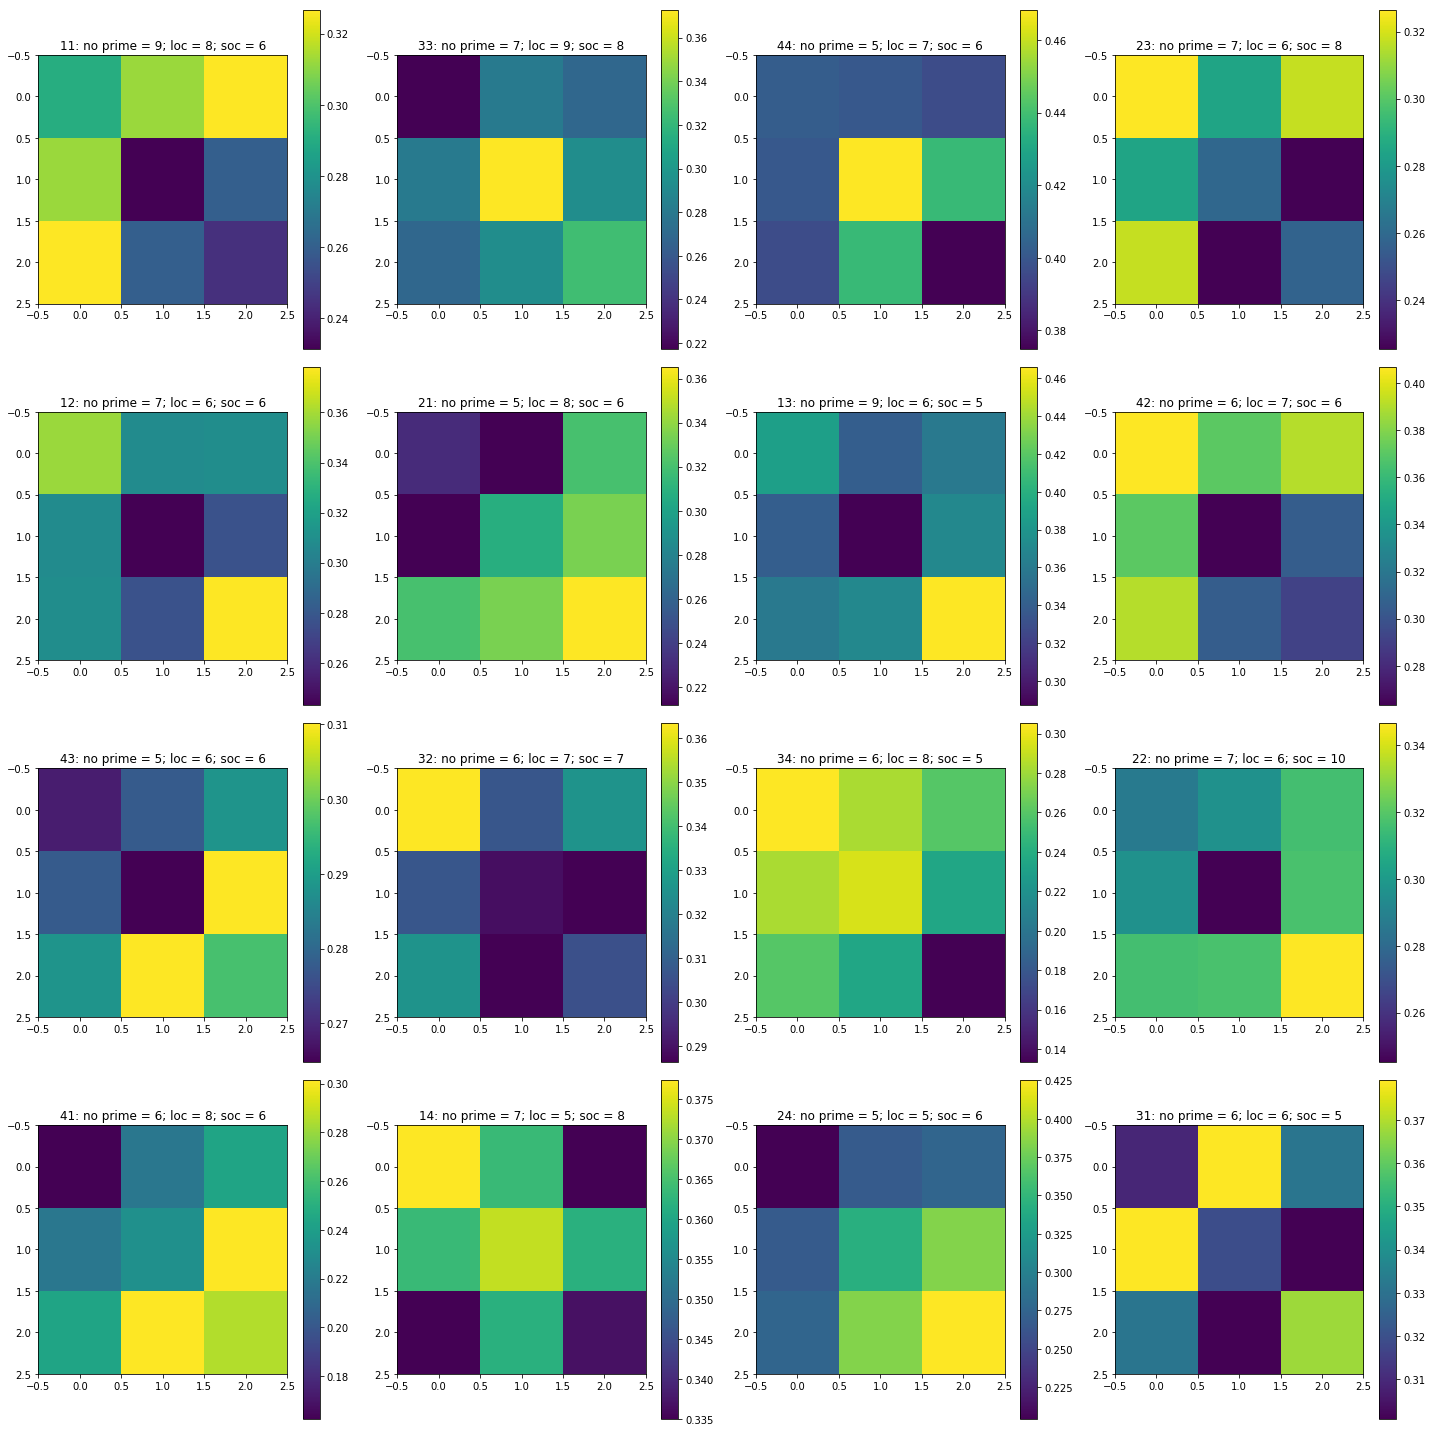

In [7]:
figure, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))

i = 0
j = 0
for key in cor_bins:
    # Make the plot
    im = axes[j, i].imshow(cor_bins[key])
    
    #colorbar
    im.set_clim()
    figure.colorbar(im, ax=axes[j, i])
    
    #set title
    none_n = sums[key][1]
    loc_n = sums[key][2]
    soc_n = sums[key][3]
    axes[j, i].set_title(str(key) + ': no prime = ' + str(none_n) + '; loc = ' + str(loc_n) + '; soc = ' + str(soc_n))
    
    #changing i, j for next graph placement
    if i == 3:
        i = 0
        j += 1
    else:
        i += 1
    figure.tight_layout()

In [8]:
# Concatenate Matrices along the third dimension
count = 0
for key in cor_bins:
    # ONLY KEEP TEMPORARILY
    # Replace zeros with nans
    cor_bins[key][cor_bins[key] <= 0] = float('Nan')
    if count == 0:
        all_cor_bins = cor_bins[key]
        count =+ 1
    else:
        all_cor_bins = np.dstack((all_cor_bins, cor_bins[key]))

# NanMean
avg_all_cor_bins_actual = np.nanmean(all_cor_bins, axis = 2)

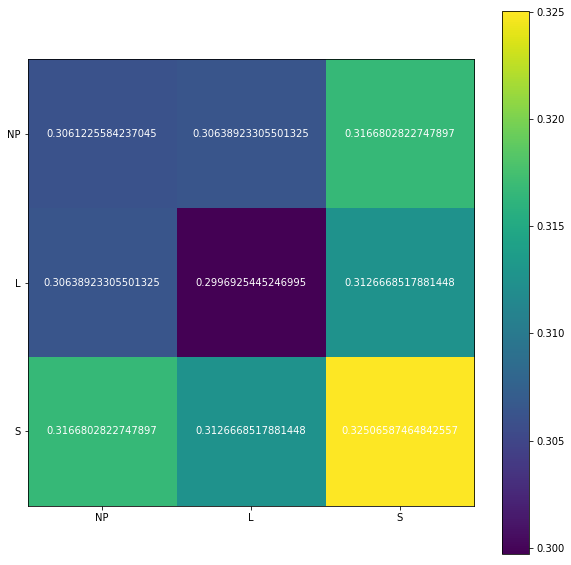

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10,10))
im = ax.imshow(avg_all_cor_bins_actual)

fig.colorbar(im)

# X ticks
x_label_list = ['NP', 'L', 'S']
ax.set_xticks([0,1,2])
ax.set_xticklabels(x_label_list)

# Y ticks
y_label_list = ['NP', 'L', 'S']
ax.set_yticks([0,1,2])
ax.set_yticklabels(x_label_list)

# Adding values to boxes
# Loop over data dimensions and create text annotations.
for i in range(0, 3):
    for j in range(0, 3):
        text = ax.text(i, j, avg_all_cor_bins_actual[j, i], ha="center", va="center", color="w")